In [1]:
import os
import json
import warnings
import matplotlib.pyplot as plt
from itertools import zip_longest
import seaborn as sns
import pandas as pd

warnings.filterwarnings("ignore")

In [2]:
from util import (
    ticker_option, combine_dfs, get_stock_price, 
    prepare_ml_dataset, concatenate_strings, train_model,
    view_shap_value_for_instance
)

In [3]:
use_cache = True

In [4]:
if os.path.exists('price.json') & use_cache:
    # Read the dictionary from the JSON file
    with open('price.json', 'r') as json_file:
        price_dict = json.load(json_file)
else:
    price_dict = {}

In [5]:
len(price_dict)

20

In [6]:
# top 20+ tickers
ticker_list = [
    "MSFT", "AAPL", "NVDA", "AMZN", "META", "GOOGL", "GOOG", "BRK.B", "LLY", "AVGO", "JPM", 
    "XOM", "TSLA", "UNH", "V", "PG", "MA", "COST", "JNJ", "HD", "MRK",
]
df = combine_dfs(ticker_list, price_dict)
df

MSFT
AAPL
NVDA
AMZN
META
GOOGL
GOOG
BRK.B
No options found for BRK.B
LLY
AVGO
JPM
XOM
TSLA
UNH
V
PG
MA
COST
JNJ
HD
MRK


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,type,exp,days_to_exp,stockPrice,option_ticker
0,AMZN240621P01540000,2022-04-27,1540.0,138.00,114.50,130.50,0.000000,0.000000,1.0,1.0,0.000010,True,REGULAR,USD,put,2024-06-21,785.21,138.17,AMZN
1,AMZN240621P01660000,2022-04-28,1660.0,84.30,145.00,161.00,0.000000,0.000000,3.0,2.0,0.000010,True,REGULAR,USD,put,2024-06-21,784.29,144.60,AMZN
2,AMZN240621C01840000,2022-04-28,1840.0,1223.65,774.00,793.00,0.000000,0.000000,2.0,2.0,0.000000,False,REGULAR,USD,call,2024-06-21,784.43,144.60,AMZN
3,AMZN240621C01640000,2022-04-29,1640.0,1114.45,904.00,922.00,0.000000,0.000000,2.0,2.0,0.000000,False,REGULAR,USD,call,2024-06-21,783.39,124.28,AMZN
4,AMZN240621C01740000,2022-04-29,1740.0,998.00,838.00,856.00,0.000000,0.000000,1.0,1.0,0.000000,False,REGULAR,USD,call,2024-06-21,783.18,124.28,AMZN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40882,JPM240719P00150000,2024-06-04,150.0,0.19,0.17,0.19,0.000000,0.000000,5.0,200.0,0.398444,False,REGULAR,USD,put,2024-07-19,44.29,199.16,JPM
40883,NVDA240719P01250000,2024-06-04,1250.0,120.27,117.60,118.90,-9.530006,-7.342069,43.0,221.0,0.400549,True,REGULAR,USD,put,2024-07-19,44.19,1164.37,NVDA
40884,JPM240719P00140000,2024-06-04,140.0,0.08,0.05,0.11,-0.030000,-27.272728,4.0,215.0,0.446295,False,REGULAR,USD,put,2024-07-19,44.41,199.16,JPM
40885,JPM240816P00180000,2024-06-04,180.0,1.62,1.48,1.59,0.090000,5.882356,8.0,693.0,0.225960,False,REGULAR,USD,put,2024-08-16,72.20,199.16,JPM


In [7]:
# save to json
with open('price.json', 'w') as json_file:
    json.dump(price_dict, json_file, indent=4)

In [8]:
df =  prepare_ml_dataset(df)
df

,strike,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,days_to_exp,stockPrice,type_call,type_put,lastPrice
0,1540.0,0.000000,0.000000,1.0,1.0,0.000010,1,785.21,138.17,0,1,138.00
1,1660.0,0.000000,0.000000,3.0,2.0,0.000010,1,784.29,144.60,0,1,84.30
2,1840.0,0.000000,0.000000,2.0,2.0,0.000000,0,784.43,144.60,1,0,1223.65
3,1640.0,0.000000,0.000000,2.0,2.0,0.000000,0,783.39,124.28,1,0,1114.45
4,1740.0,0.000000,0.000000,1.0,1.0,0.000000,0,783.18,124.28,1,0,998.00
...,...,...,...,...,...,...,...,...,...,...,...,...
22782,1280.0,-49.140000,-24.571228,6.0,87.0,0.397620,1,44.42,1164.37,0,1,150.85
22783,1270.0,-48.149994,-25.308802,5.0,115.0,0.398627,1,44.42,1164.37,0,1,142.10
22784,1260.0,-14.340012,-10.038510,4.0,4.0,0.400091,1,44.19,1164.37,0,1,128.51
22785,215.0,2.370000,16.288658,3.0,4.0,0.234139,1,44.31,199.16,0,1,16.92


In [9]:
# df = df[df['volume'] > 10].reset_index(drop=True)

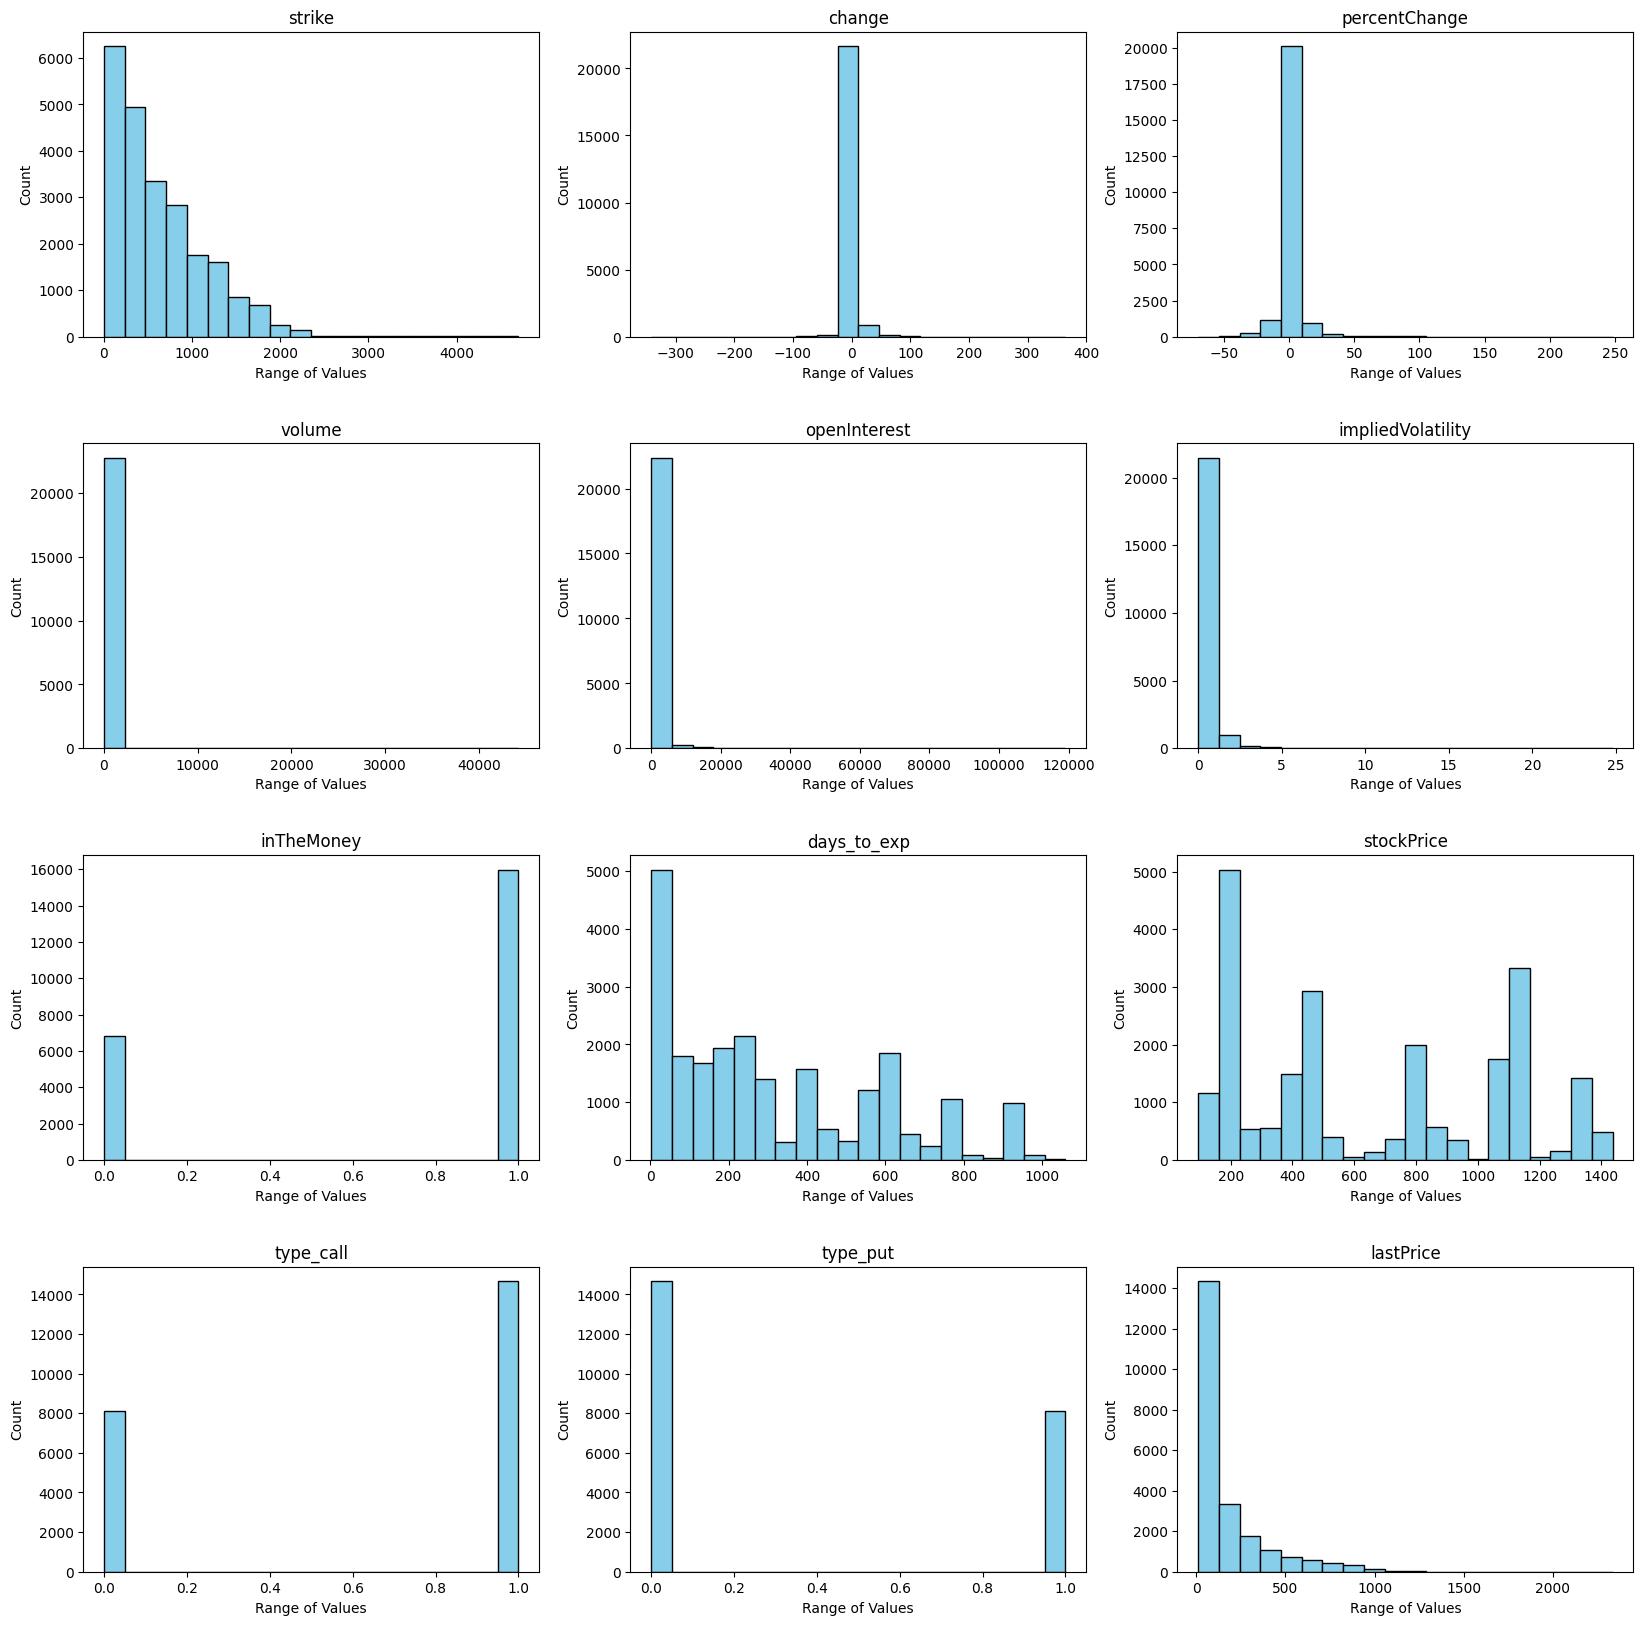

In [10]:
# Histogram plot of features
fig, axes = plt.subplots(4, 3, figsize=(20, 20), gridspec_kw={'hspace': 0.35})

axes_flat = axes.flatten()

for ax, col in zip_longest(axes_flat, df.iloc[:, :].columns):
    if col != None:
        ax.hist(df[col], bins=20, color='skyblue', edgecolor='black')
        ax.set_title(f"{col}")
        ax.set_xlabel('Range of Values')
        ax.set_ylabel('Count')
    else:
        ax.axis("off")

plt.show()

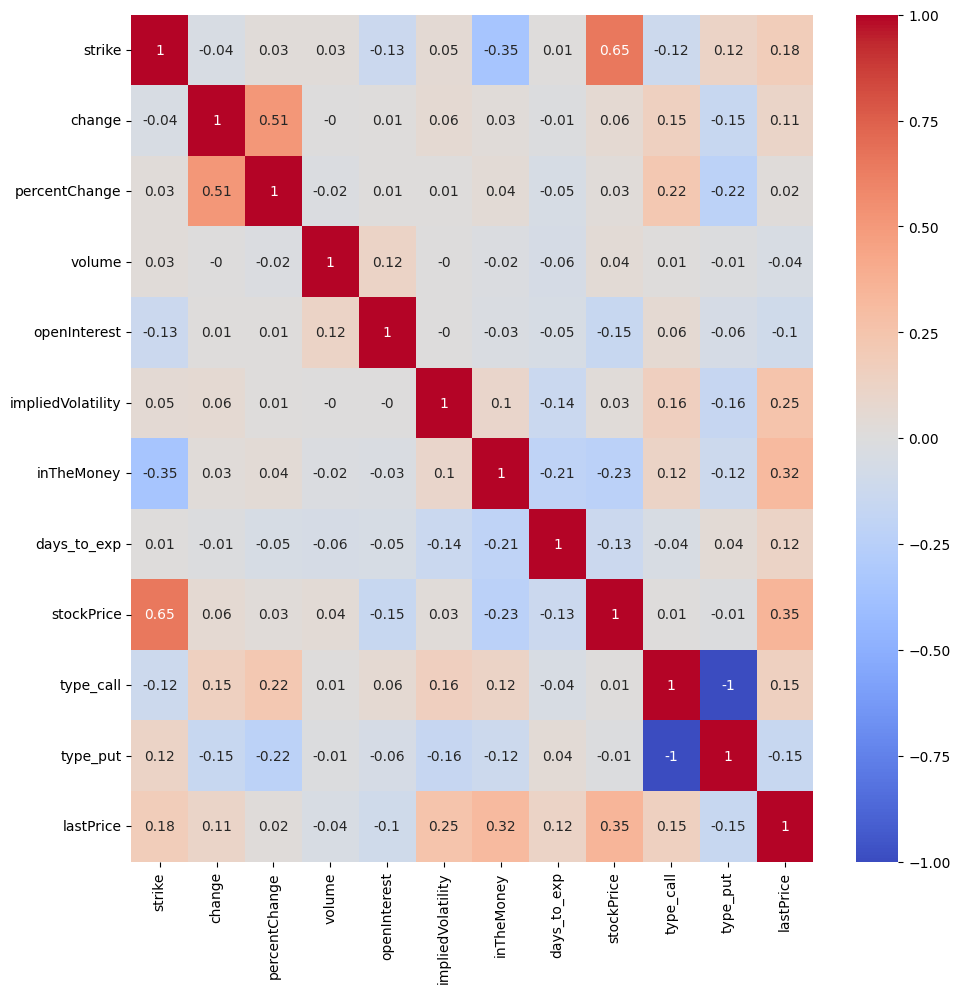

In [11]:
plt.figure(figsize = (11, 11))
sns.heatmap(round(pd.DataFrame(df, columns=df.columns).corr(), 2), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

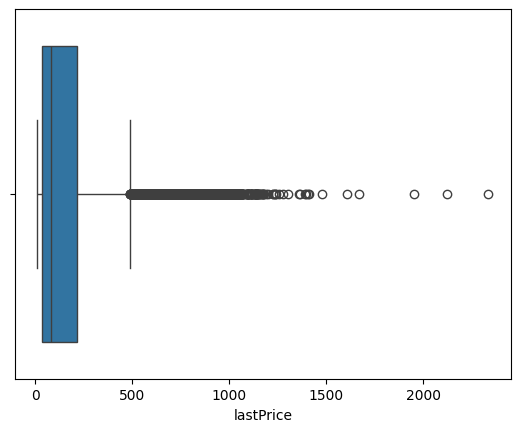

In [12]:
sns.boxplot(data=df['lastPrice'], orient='h')
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22787 entries, 0 to 22786
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   strike             22787 non-null  float64
 1   change             22787 non-null  float64
 2   percentChange      22787 non-null  float64
 3   volume             22787 non-null  float64
 4   openInterest       22787 non-null  float64
 5   impliedVolatility  22787 non-null  float64
 6   inTheMoney         22787 non-null  int32  
 7   days_to_exp        22787 non-null  float64
 8   stockPrice         22787 non-null  float64
 9   type_call          22787 non-null  int32  
 10  type_put           22787 non-null  int32  
 11  lastPrice          22787 non-null  float64
dtypes: float64(9), int32(3)
memory usage: 1.8 MB


In [14]:
df.describe()

,strike,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,days_to_exp,stockPrice,type_call,type_put,lastPrice
count,22787.000000,22787.000000,22787.000000,22787.000000,22787.000000,22787.000000,22787.000000,22787.000000,22787.000000,22787.000000,22787.000000,22787.000000
mean,636.638134,0.805013,0.645561,43.998113,585.184184,0.532901,0.701145,311.357168,658.480610,0.643437,0.356563,170.885383
std,521.767703,13.662298,8.838999,531.723763,2357.128805,0.722251,0.457766,268.448564,421.865063,0.478995,0.478995,215.791027
min,1.670000,-342.050000,-70.000000,1.000000,0.000000,0.000000,0.000000,2.170000,94.650000,0.000000,0.000000,10.010000
25%,220.000000,0.000000,0.000000,1.000000,9.000000,0.285659,0.000000,72.380000,194.350000,0.000000,0.000000,32.800000
50%,480.000000,0.000000,0.000000,2.000000,62.000000,0.419439,1.000000,227.390000,483.590000,1.000000,0.000000,80.030000
75%,910.000000,0.000000,0.000000,9.000000,319.000000,0.558690,1.000000,562.420000,1096.330000,1.000000,1.000000,215.490000
max,4700.000000,364.780030,248.272160,44217.000000,119136.000000,24.805666,1.000000,1059.290000,1436.170000,1.000000,1.000000,2335.300000


In [15]:
# check if any of the column values is null
df[df.isna().any(axis=1)]

,strike,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,days_to_exp,stockPrice,type_call,type_put,lastPrice


In [16]:
# models = [
#     df
# ]

In [17]:
models = [
    df[(df['lastPrice'] >= 10) & (df['lastPrice'] < 25)],
    df[(df['lastPrice'] >= 25) & (df['lastPrice'] < 50)],
    df[(df['lastPrice'] >= 50) & (df['lastPrice'] < 100)],
    df[(df['lastPrice'] >= 100) & (df['lastPrice'] < 250)],
    df[(df['lastPrice'] >= 250) & (df['lastPrice'] < 500)],
    df[(df['lastPrice'] >= 500) & (df['lastPrice'] < 1000)],
    df[(df['lastPrice'] >= 1000)]
]

4238
bests:
{'clf': GradientBoostingRegressor(), 'clf__max_depth': 4, 'clf__n_estimators': 250}
0.5371461771905646


,idn,params,mean_test_score
0,GradientBoostingRegressor()_4_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.537146
1,GradientBoostingRegressor()_4_200,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.522888
2,GradientBoostingRegressor()_3_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.495132
3,GradientBoostingRegressor()_3_200,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.468772
4,GradientBoostingRegressor()_2_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.410514
5,GradientBoostingRegressor()_2_200,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.373305
6,RandomForestRegressor()_4_200,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.138598
7,RandomForestRegressor()_4_250,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.137597
8,RandomForestRegressor()_3_250,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.090652
9,RandomForestRegressor()_3_200,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.089562


,idn,params,mean_test_score
0,GradientBoostingRegressor()_4_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.537146


model performance:
0.5488528813550707
2.2927891464336634
8.591976141384118
2.9312072839333827


,Predict,Actual
0,14.939178,12.55
1,13.524221,10.70
2,19.978008,24.70
3,16.014001,13.40
4,14.929649,11.75
...,...,...
1055,14.627285,13.50
1056,16.651781,19.75
1057,17.801241,15.80
1058,15.704249,16.80


shap summary plots


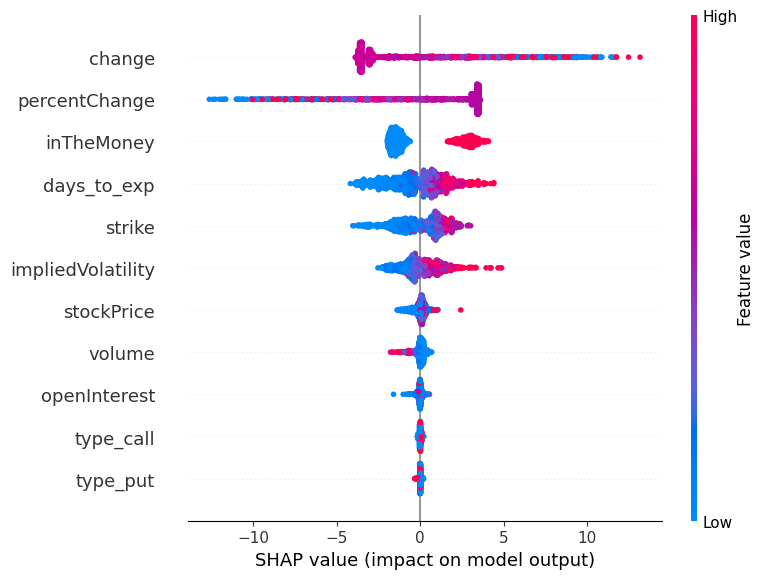

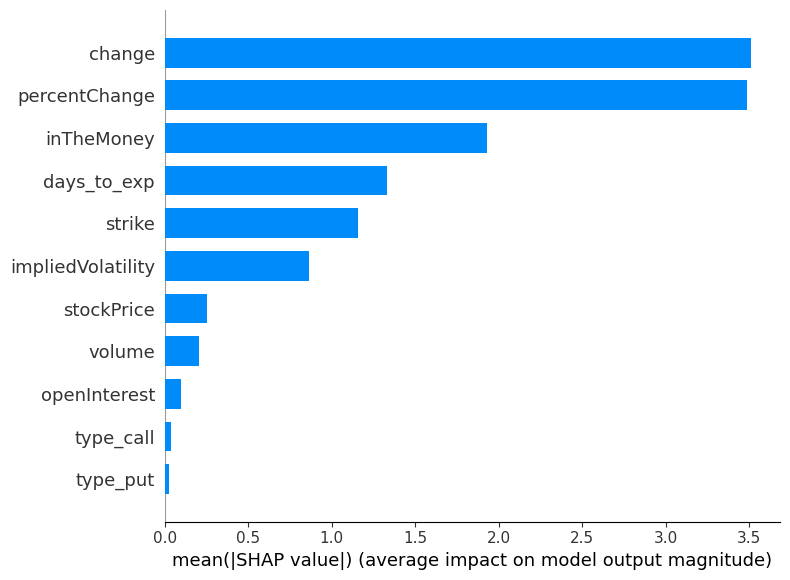

Top 5 features - shap values vs. feature values


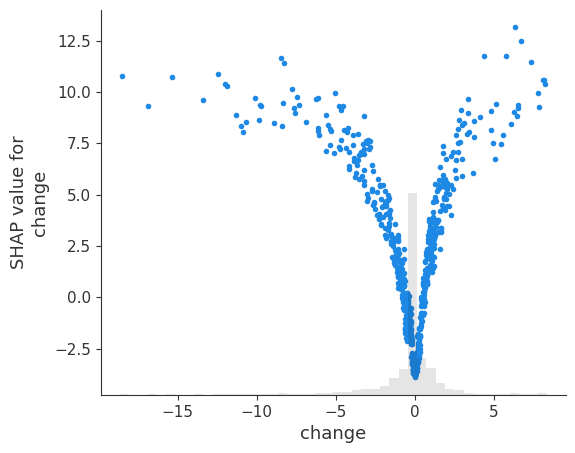

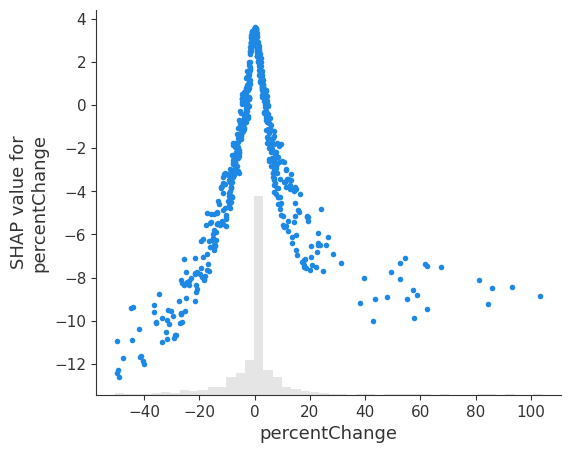

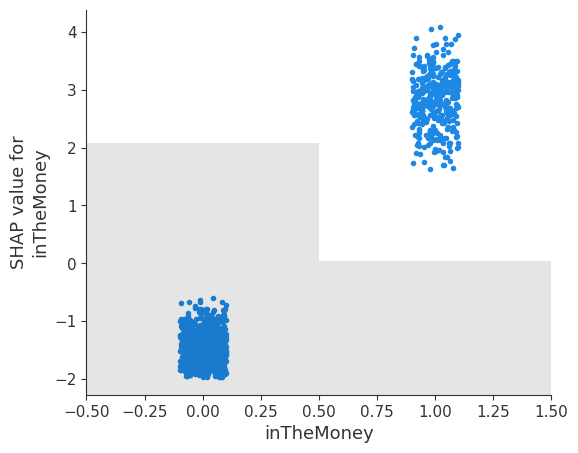

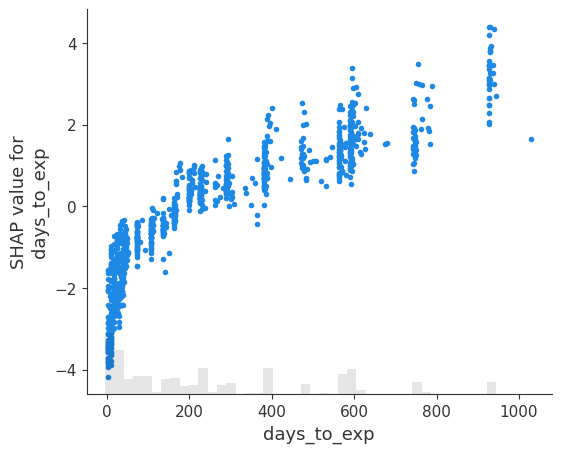

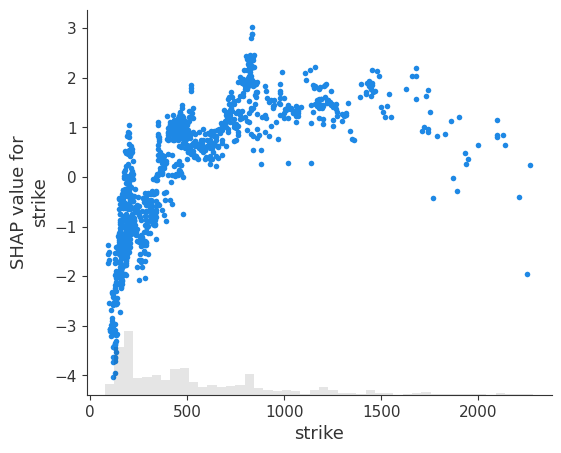

,strike,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,days_to_exp,stockPrice,type_call,type_put
13042,225.0,0.0,0.0,2.0,542.0,0.271278,0,472.31,192.25,1,0


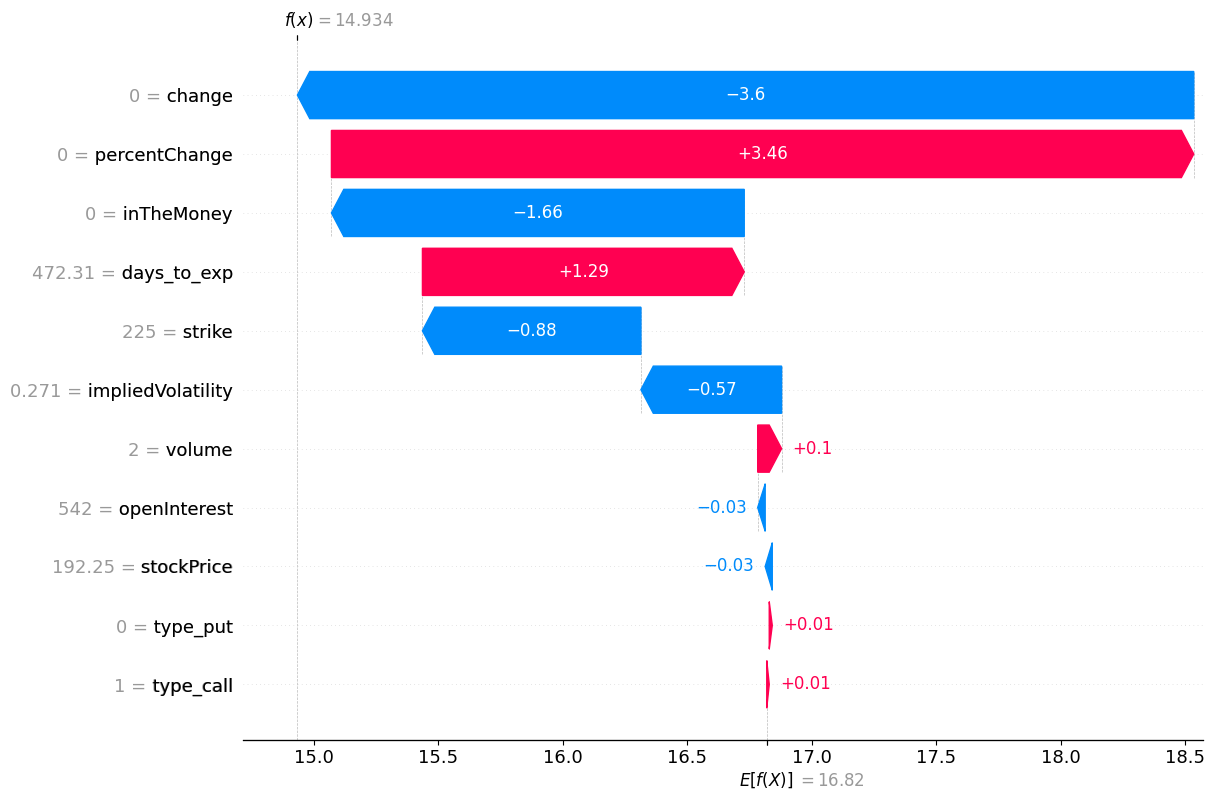

predict
14.933928105230395
actual
12.55
3939
bests:
{'clf': GradientBoostingRegressor(), 'clf__max_depth': 4, 'clf__n_estimators': 250}
0.5296356574849936


,idn,params,mean_test_score
0,GradientBoostingRegressor()_4_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.529636
1,GradientBoostingRegressor()_4_200,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.508830
2,GradientBoostingRegressor()_3_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.450976
3,GradientBoostingRegressor()_3_200,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.425451
4,GradientBoostingRegressor()_2_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.323867
5,GradientBoostingRegressor()_2_200,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.294133
6,RandomForestRegressor()_4_250,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.153301
7,RandomForestRegressor()_4_200,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.152787
8,DecisionTreeRegressor()_4,"{'clf': DecisionTreeRegressor(), 'clf__max_dep...",0.103350
9,RandomForestRegressor()_3_200,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.093815


,idn,params,mean_test_score
0,GradientBoostingRegressor()_4_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.529636


model performance:
0.5752361551052474
3.6445147845255033
21.62623765142636
4.650401880636378


,Predict,Actual
0,38.063628,36.21
1,31.243137,29.70
2,45.089908,41.50
3,32.687009,29.00
4,31.019072,31.32
...,...,...
980,35.992095,30.29
981,38.733316,41.57
982,25.717558,28.10
983,42.865698,30.50


shap summary plots


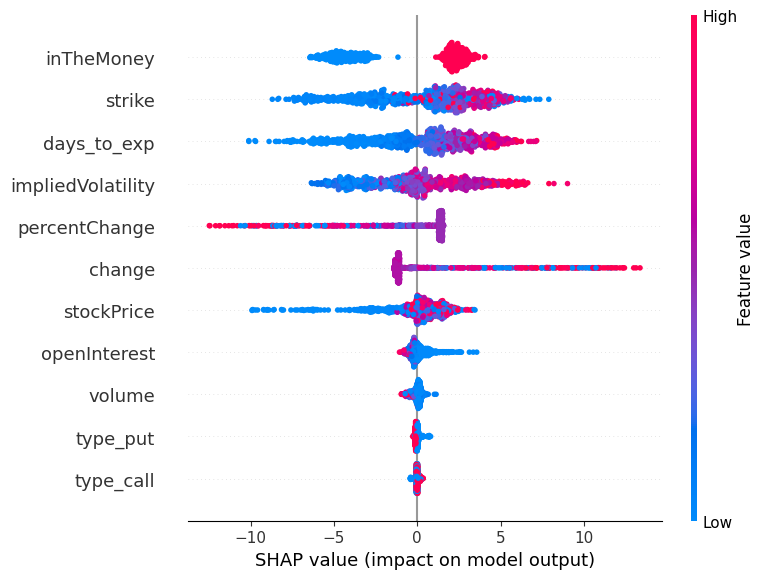

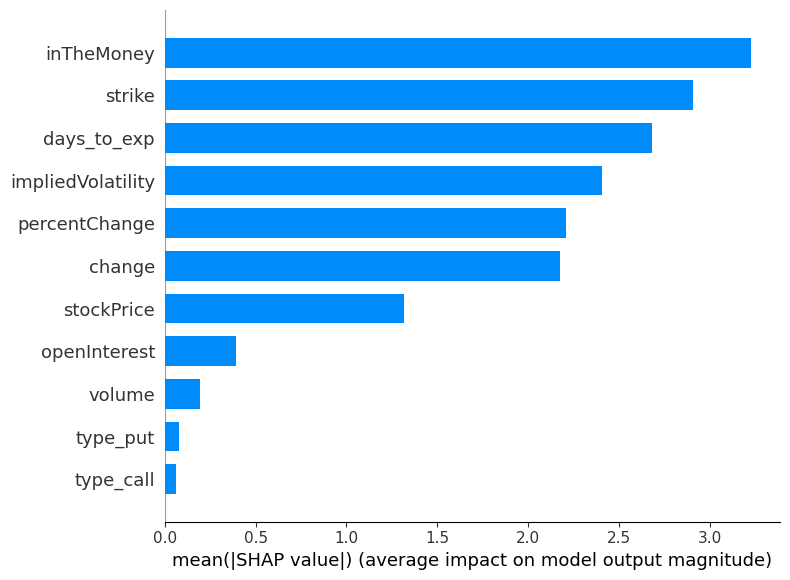

Top 5 features - shap values vs. feature values


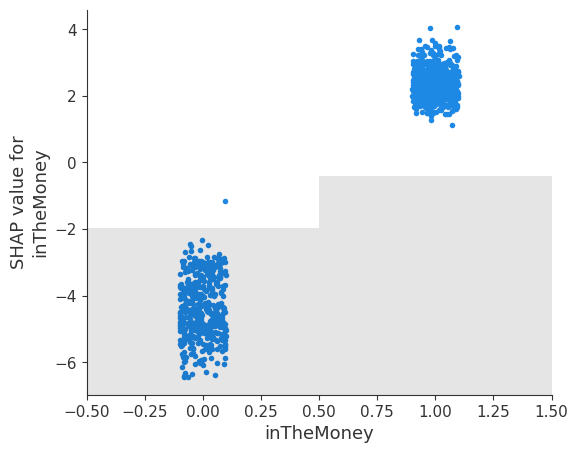

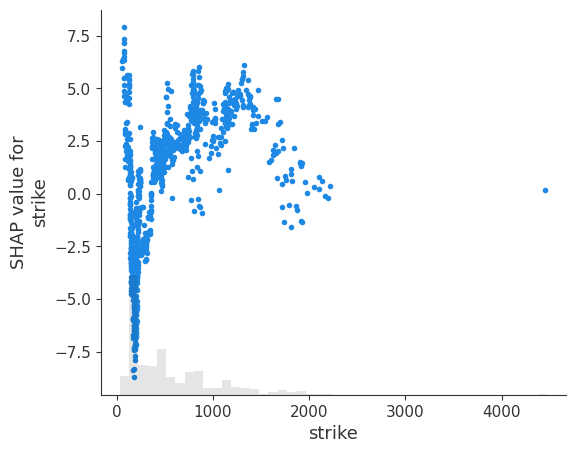

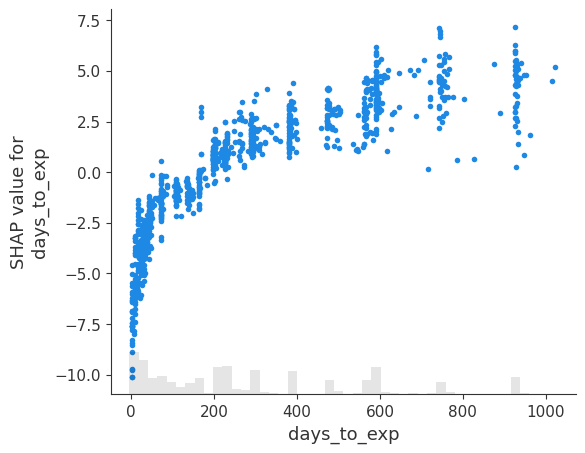

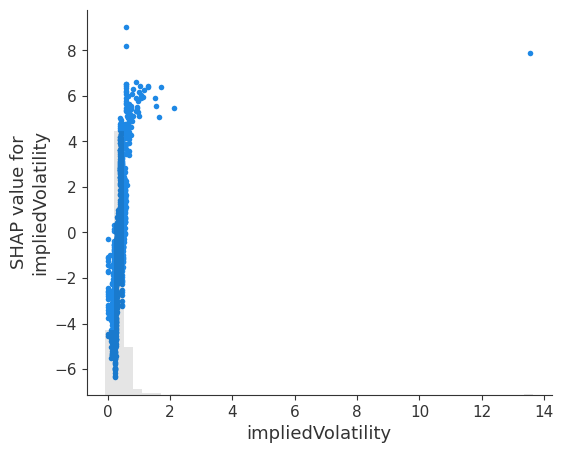

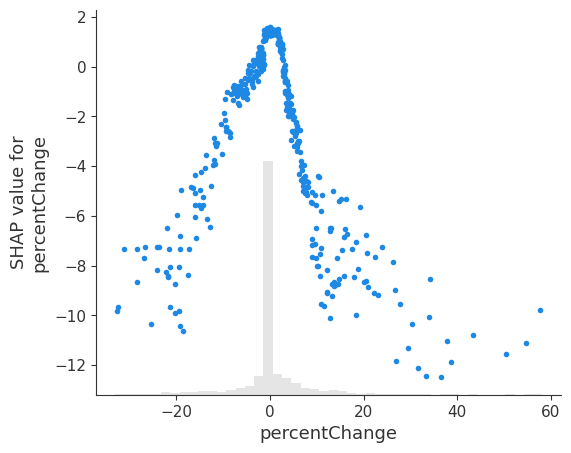

,strike,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,days_to_exp,stockPrice,type_call,type_put
9194,215.0,0.0,0.0,5.0,0.0,0.646976,1,14.18,179.32,0,1


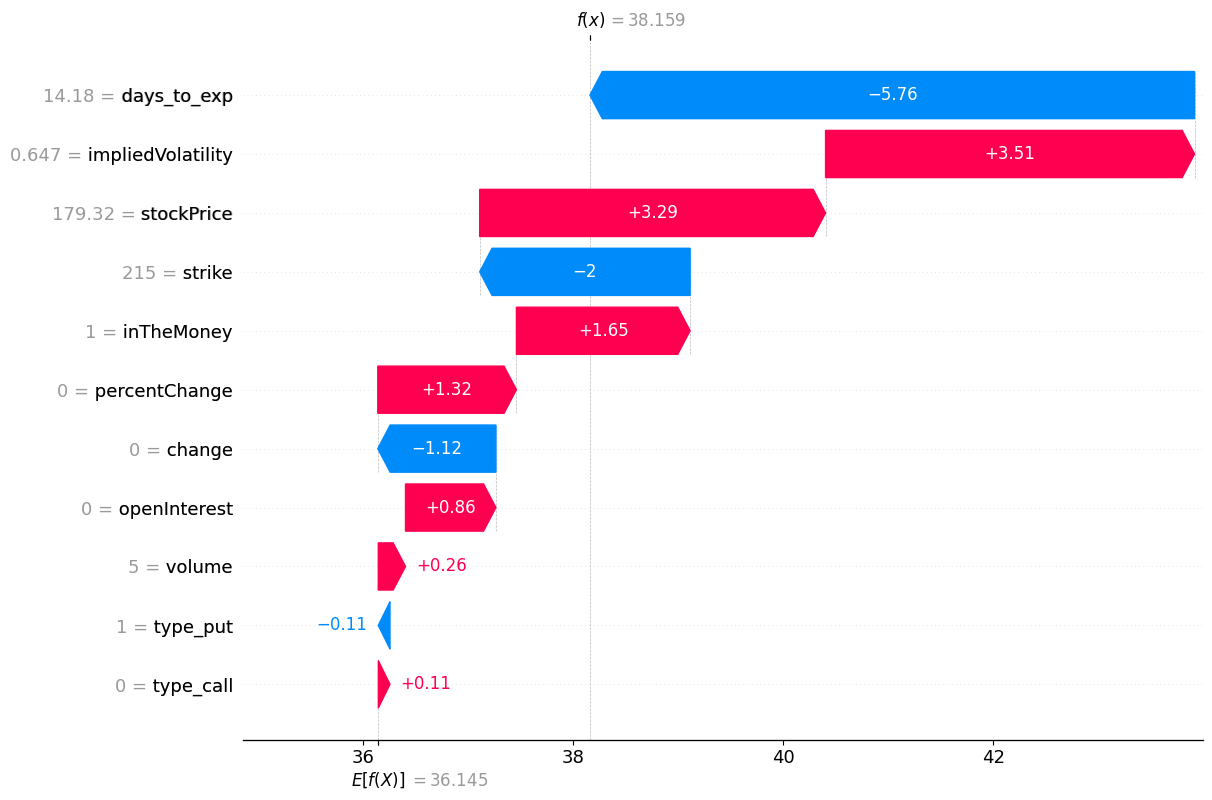

predict
38.15912553043168
actual
36.21
4685
bests:
{'clf': GradientBoostingRegressor(), 'clf__max_depth': 4, 'clf__n_estimators': 250}
0.6437096269366042


,idn,params,mean_test_score
0,GradientBoostingRegressor()_4_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.643710
1,GradientBoostingRegressor()_4_200,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.625058
2,GradientBoostingRegressor()_3_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.566502
3,GradientBoostingRegressor()_3_200,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.537742
4,GradientBoostingRegressor()_2_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.455817
5,GradientBoostingRegressor()_2_200,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.427563
6,RandomForestRegressor()_4_250,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.291010
7,RandomForestRegressor()_4_200,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.289821
8,DecisionTreeRegressor()_4,"{'clf': DecisionTreeRegressor(), 'clf__max_dep...",0.242075
9,RandomForestRegressor()_3_200,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.213943


,idn,params,mean_test_score
0,GradientBoostingRegressor()_4_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.64371


model performance:
0.6868065101326977
6.029119573063264
62.434936685335
7.901578113600789


,Predict,Actual
0,73.670952,73.80
1,76.043427,95.00
2,83.867340,84.50
3,75.627613,65.79
4,67.585309,52.00
...,...,...
1167,80.592812,99.70
1168,82.906443,79.31
1169,64.157085,61.33
1170,79.608506,77.01


shap summary plots


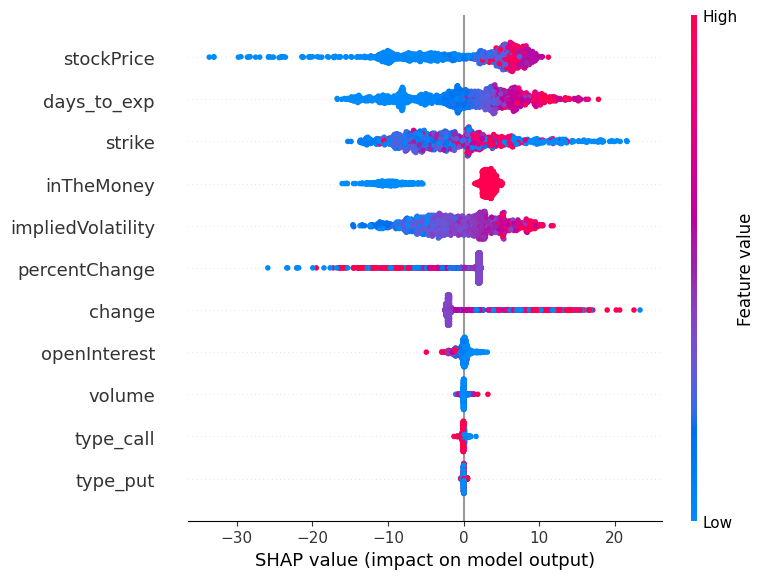

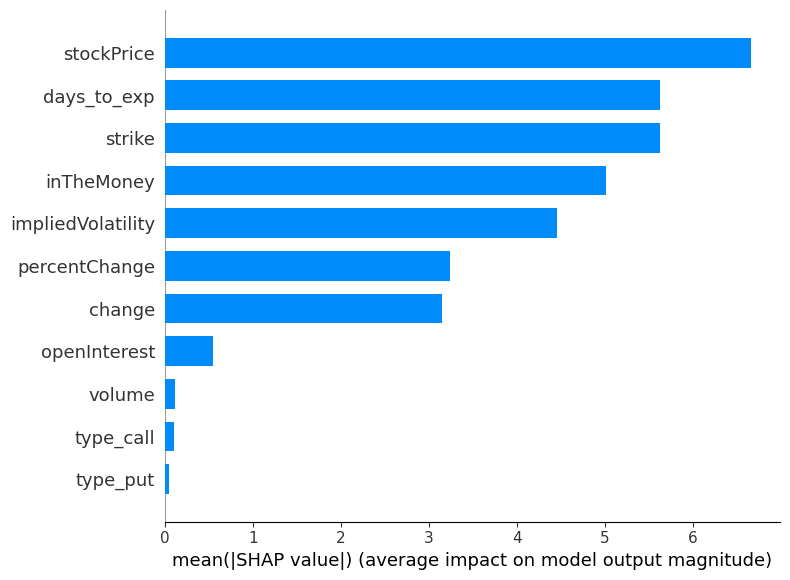

Top 5 features - shap values vs. feature values


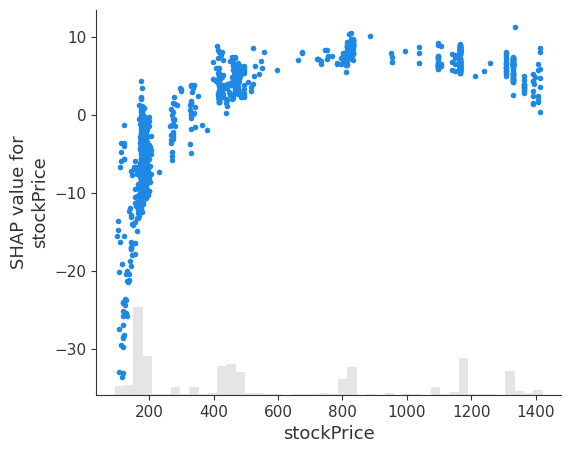

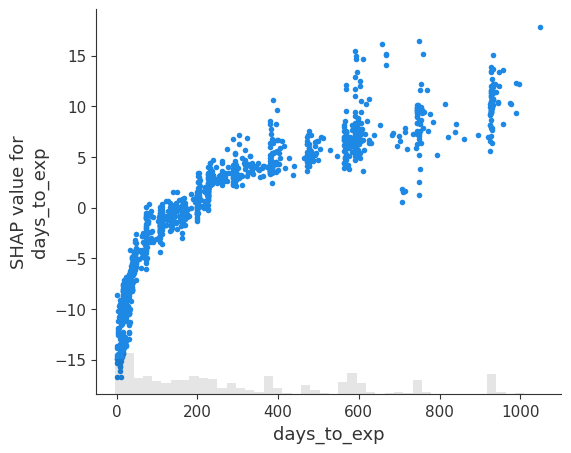

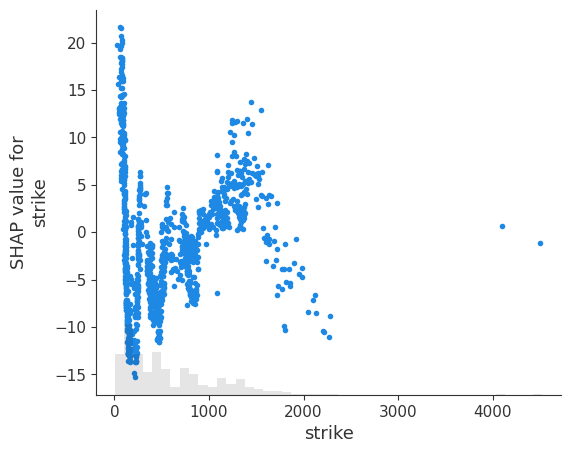

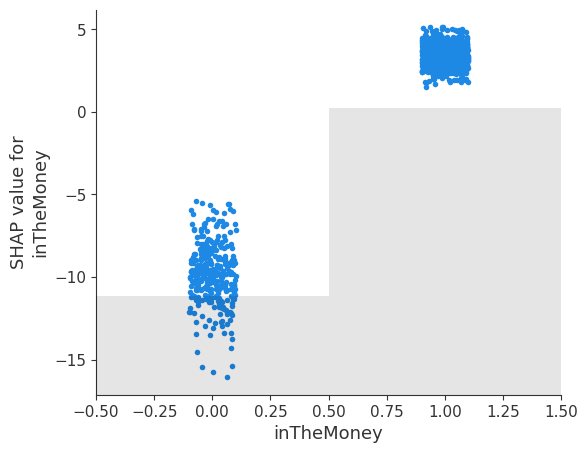

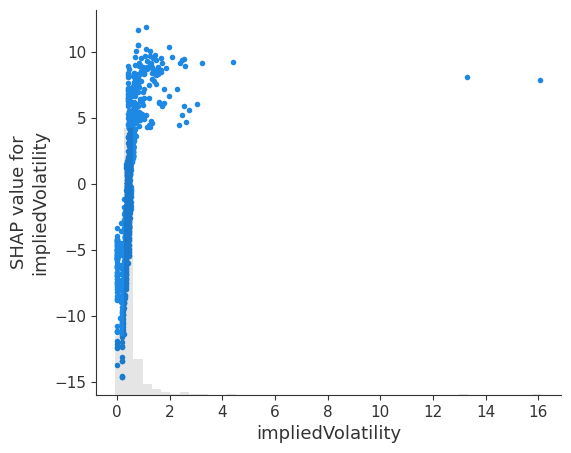

,strike,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,days_to_exp,stockPrice,type_call,type_put
22651,1215.0,8.790001,13.520998,16.0,86.0,0.469045,0,72.22,1164.37,1,0


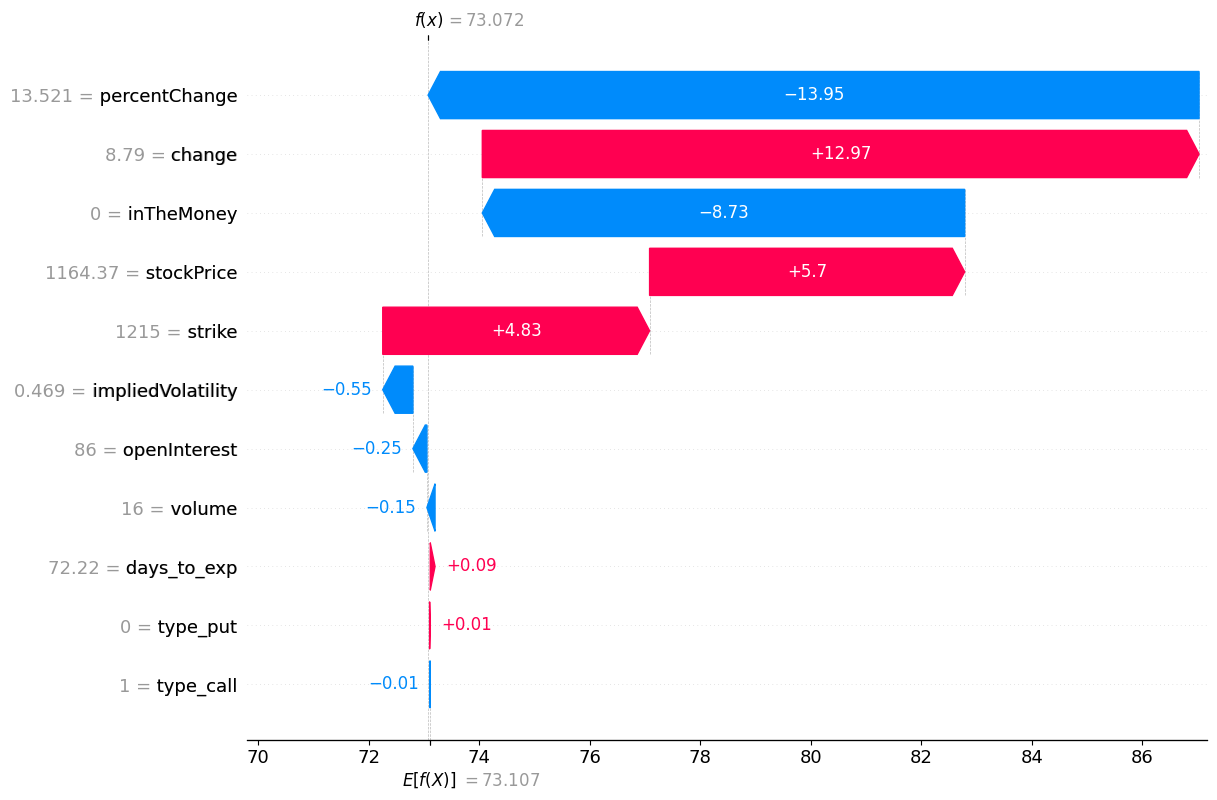

predict
73.07184456484342
actual
73.8
4960
bests:
{'clf': GradientBoostingRegressor(), 'clf__max_depth': 4, 'clf__n_estimators': 250}
0.82103061899904


,idn,params,mean_test_score
0,GradientBoostingRegressor()_4_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.821031
1,GradientBoostingRegressor()_4_200,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.795513
2,GradientBoostingRegressor()_3_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.740318
3,GradientBoostingRegressor()_3_200,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.706008
4,GradientBoostingRegressor()_2_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.580686
5,GradientBoostingRegressor()_2_200,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.543141
6,RandomForestRegressor()_4_200,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.289663
7,RandomForestRegressor()_4_250,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.288417
8,DecisionTreeRegressor()_4,"{'clf': DecisionTreeRegressor(), 'clf__max_dep...",0.251790
9,RandomForestRegressor()_3_200,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.225292


,idn,params,mean_test_score
0,GradientBoostingRegressor()_4_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.821031


model performance:
0.843699324351574
12.166035511331886
280.6996052732763
16.75409219484232


,Predict,Actual
0,145.126365,127.26
1,125.464177,130.00
2,164.415617,185.57
3,125.643231,124.75
4,127.432078,130.95
...,...,...
1235,175.088599,154.90
1236,143.244032,126.06
1237,95.057074,102.00
1238,152.447266,165.00


shap summary plots


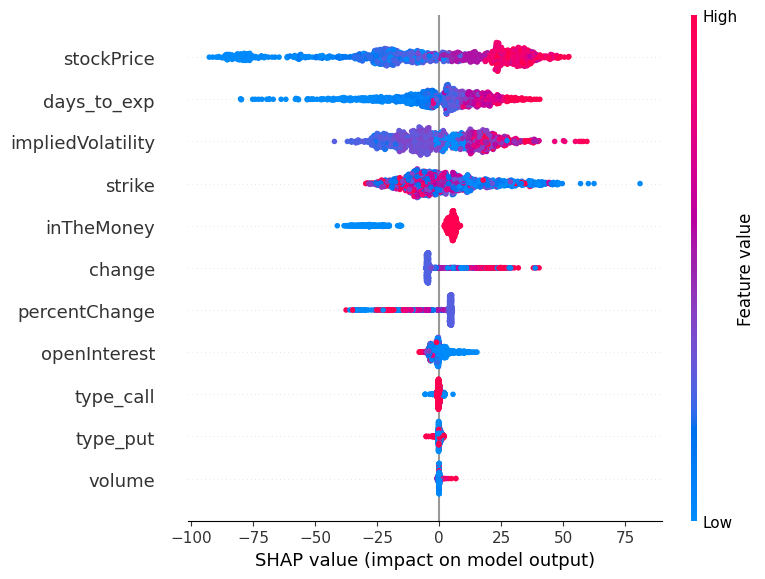

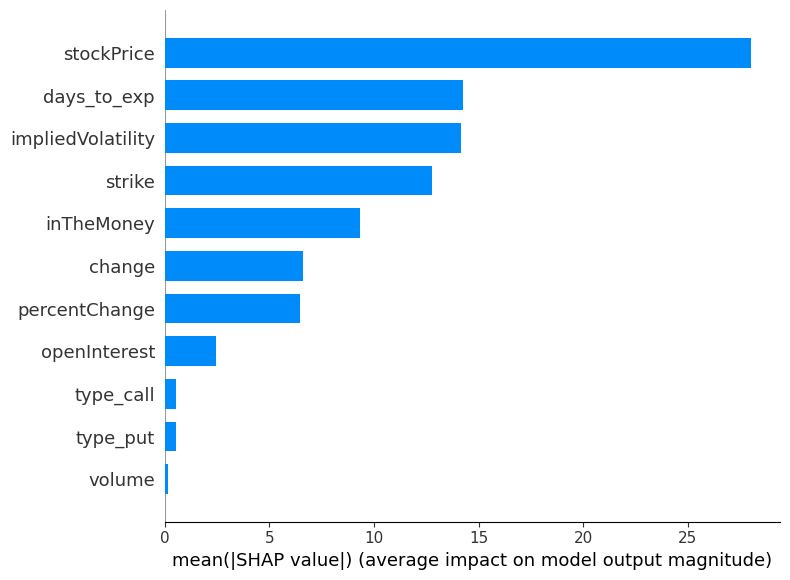

Top 5 features - shap values vs. feature values


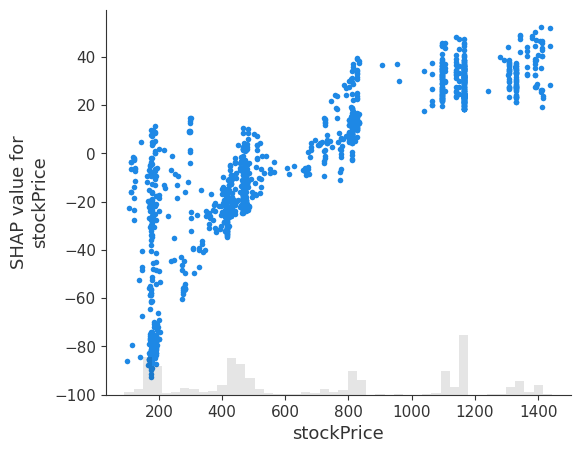

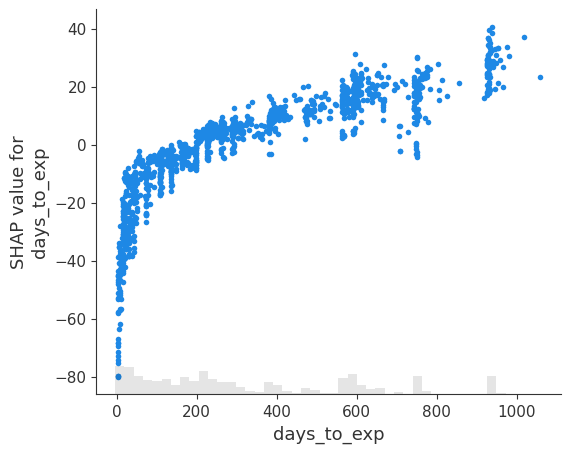

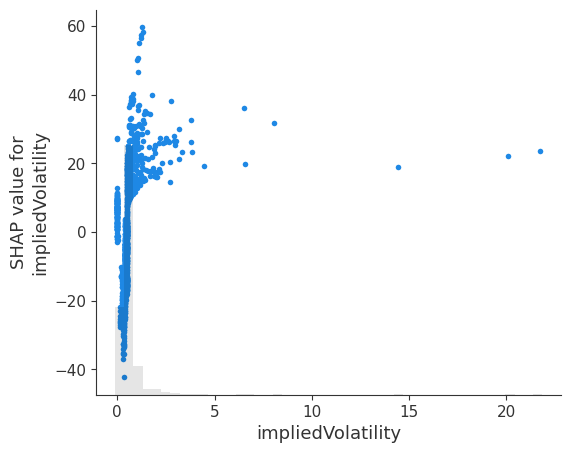

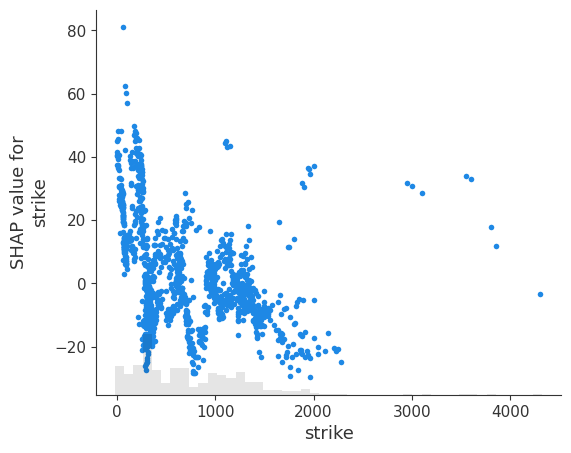

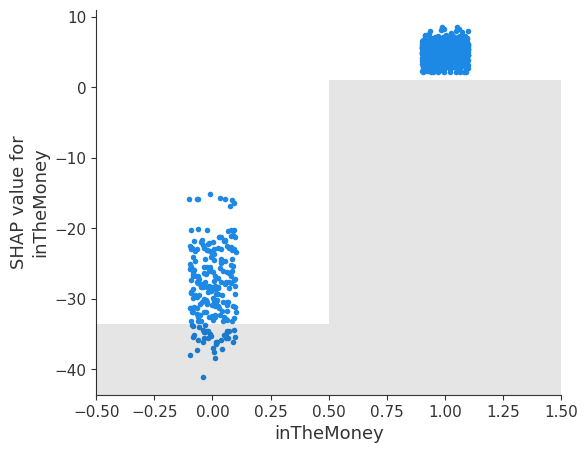

,strike,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,days_to_exp,stockPrice,type_call,type_put
13704,1700.0,0.0,0.0,11.0,300.0,0.37863,0,591.17,1307.88,1,0


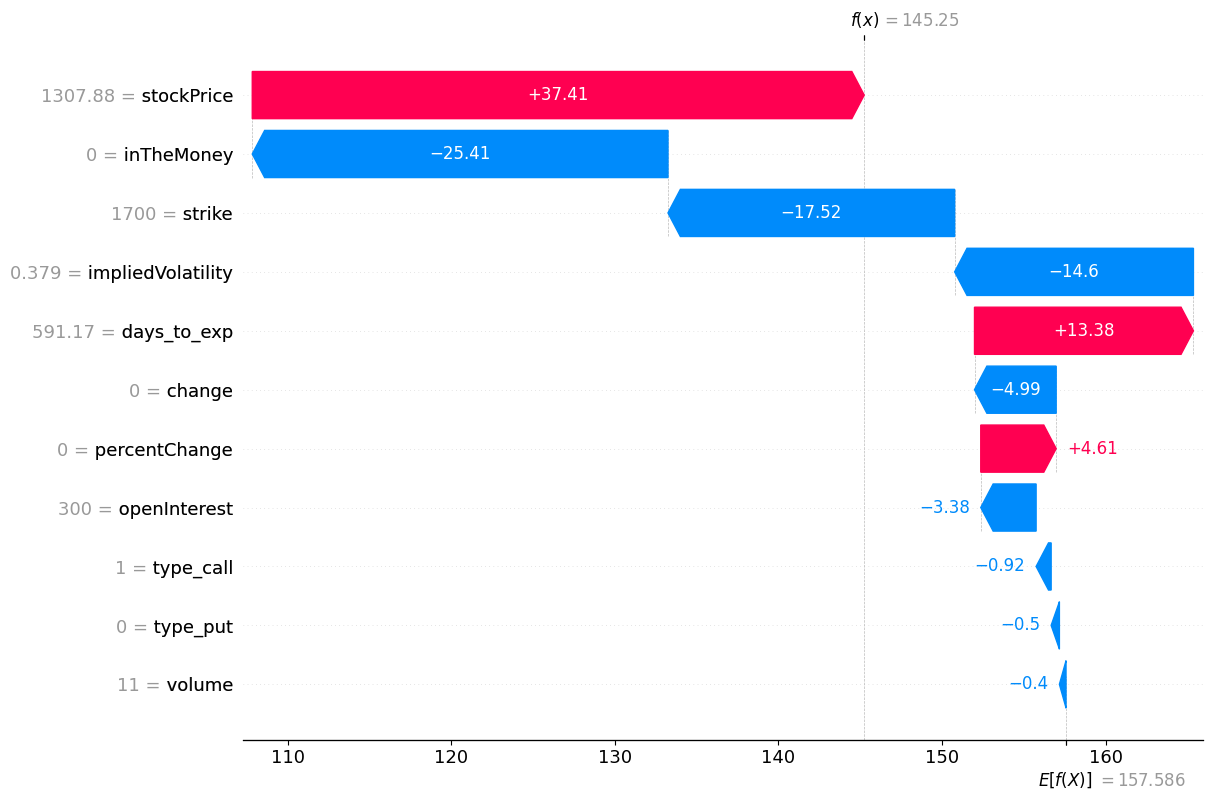

predict
145.2496036927736
actual
127.26
2819
bests:
{'clf': GradientBoostingRegressor(), 'clf__max_depth': 4, 'clf__n_estimators': 250}
0.8790649552552605


,idn,params,mean_test_score
0,GradientBoostingRegressor()_4_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.879065
1,GradientBoostingRegressor()_4_200,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.867414
2,GradientBoostingRegressor()_3_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.830110
3,GradientBoostingRegressor()_3_200,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.809131
4,GradientBoostingRegressor()_2_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.687572
5,GradientBoostingRegressor()_2_200,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.654733
6,RandomForestRegressor()_4_250,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.478973
7,RandomForestRegressor()_4_200,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.478873
8,DecisionTreeRegressor()_4,"{'clf': DecisionTreeRegressor(), 'clf__max_dep...",0.371445
9,RandomForestRegressor()_3_200,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.336757


,idn,params,mean_test_score
0,GradientBoostingRegressor()_4_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.879065


model performance:
0.8894919554400003
16.009116915944965
537.1086318288174
23.175604238699307


,Predict,Actual
0,328.437744,336.64
1,340.424181,344.98
2,300.615038,274.49
3,312.157980,300.99
4,322.262450,337.85
...,...,...
700,446.775693,440.21
701,390.976785,395.08
702,406.405387,405.22
703,289.616206,260.16


shap summary plots


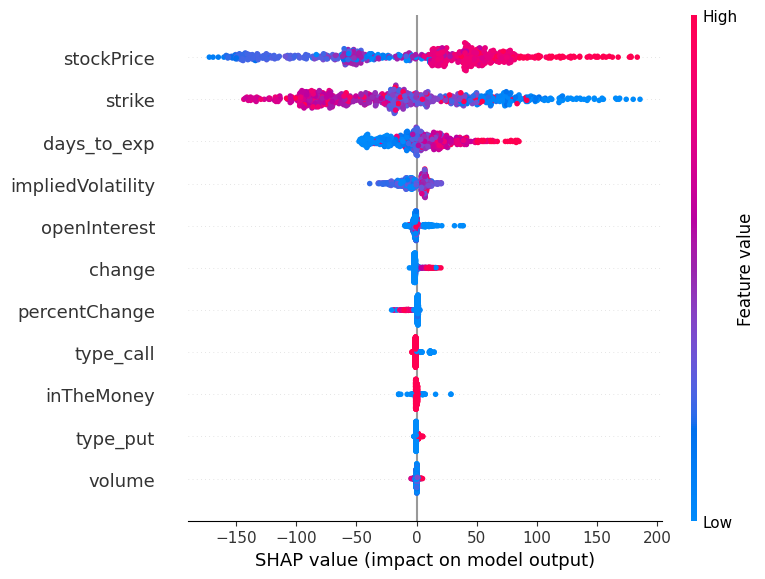

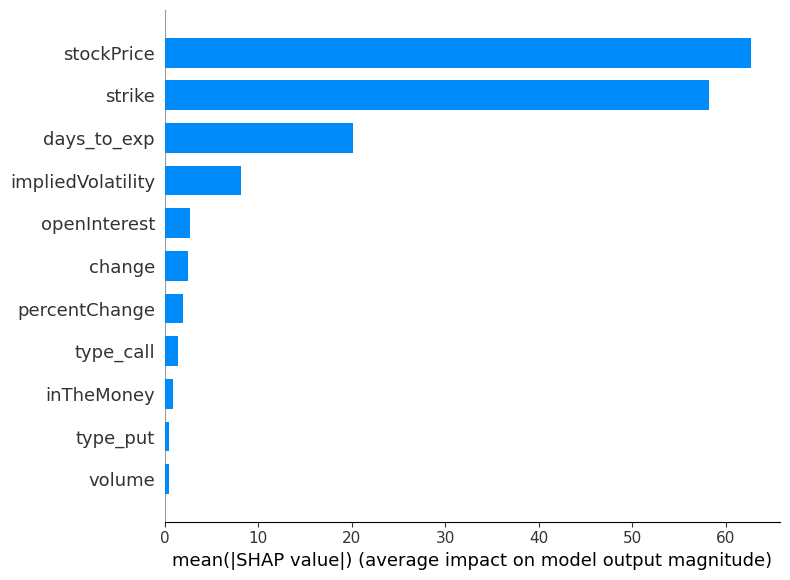

Top 5 features - shap values vs. feature values


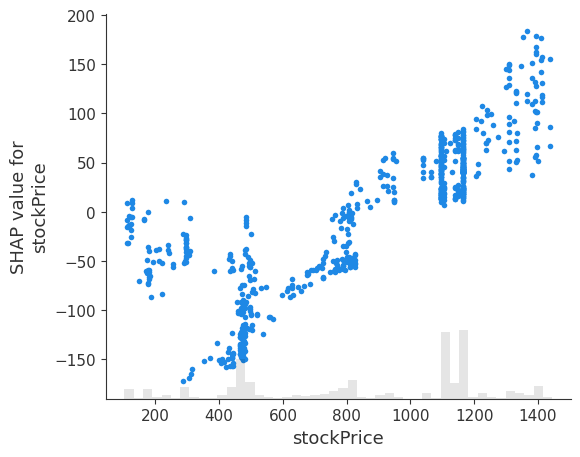

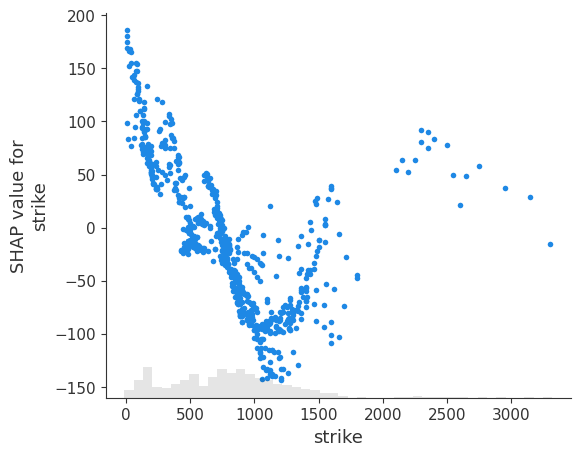

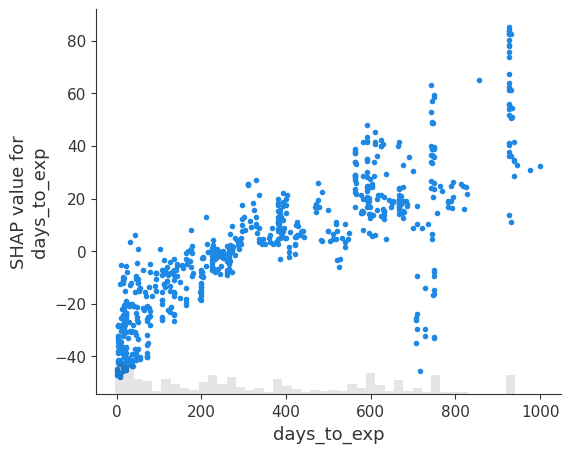

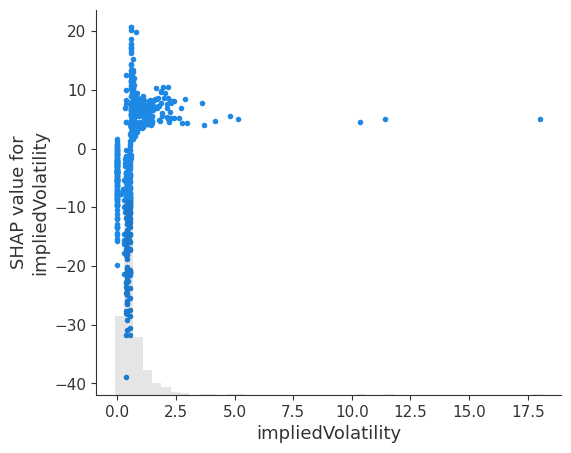

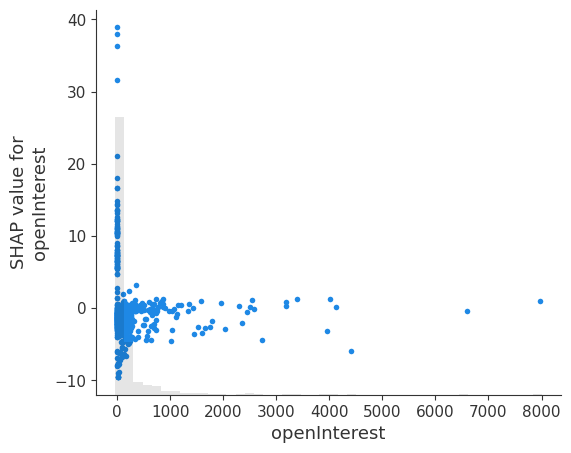

,strike,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,days_to_exp,stockPrice,type_call,type_put
19879,1300.0,-98.94998,-22.716312,3.0,44.0,0.373553,1,743.29,1164.37,0,1


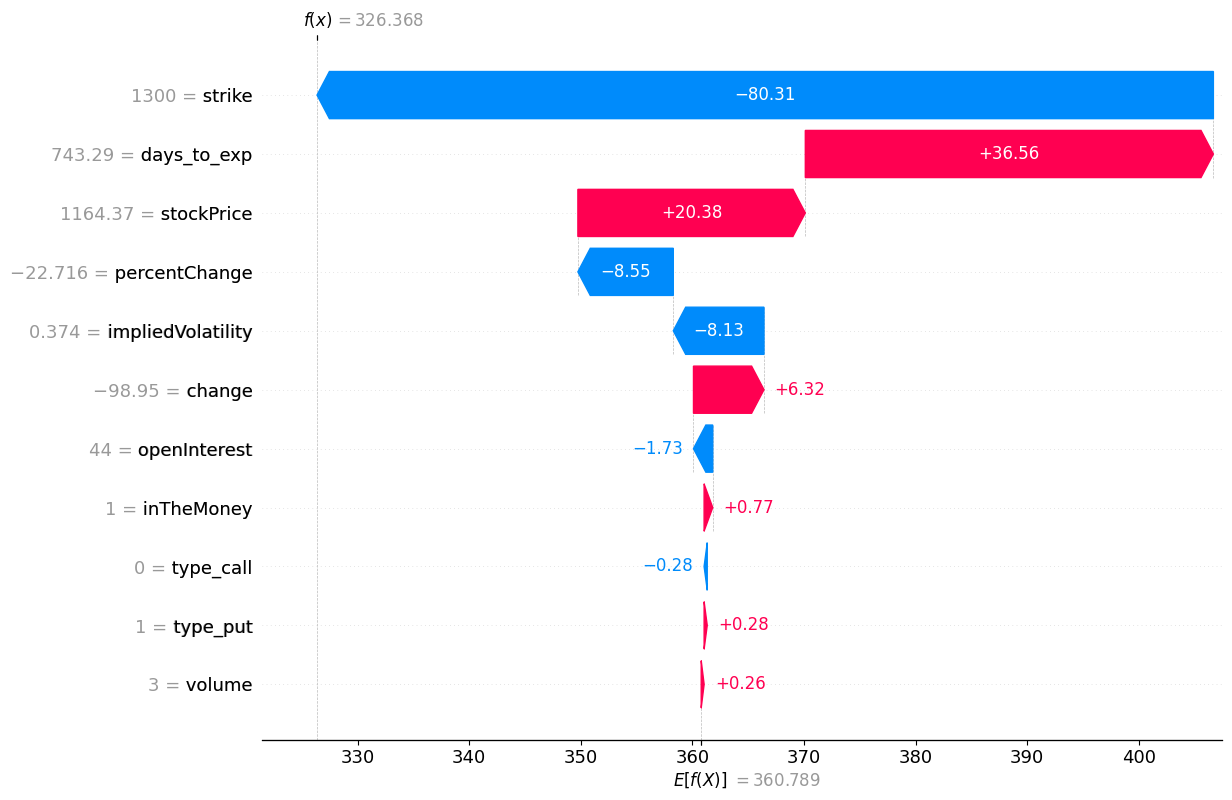

predict
326.36804441770477
actual
336.64
2003
bests:
{'clf': GradientBoostingRegressor(), 'clf__max_depth': 4, 'clf__n_estimators': 250}
0.9543090757691679


,idn,params,mean_test_score
0,GradientBoostingRegressor()_4_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.954309
1,GradientBoostingRegressor()_4_200,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.952963
2,GradientBoostingRegressor()_3_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.945199
3,GradientBoostingRegressor()_3_200,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.938691
4,GradientBoostingRegressor()_2_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.895451
5,GradientBoostingRegressor()_2_200,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.880505
6,RandomForestRegressor()_4_200,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.767706
7,RandomForestRegressor()_4_250,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.766054
8,DecisionTreeRegressor()_4,"{'clf': DecisionTreeRegressor(), 'clf__max_dep...",0.677730
9,RandomForestRegressor()_3_250,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.641061


,idn,params,mean_test_score
0,GradientBoostingRegressor()_4_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.954309


model performance:
0.9624161379810563
18.455306951845905
705.3158948283761
26.557784072252264


,Predict,Actual
0,697.878563,691.04
1,865.333118,863.18
2,851.802375,936.73
3,542.931190,504.00
4,621.979553,606.00
...,...,...
496,565.705438,541.45
497,588.405262,584.19
498,674.726509,644.80
499,889.906647,890.20


shap summary plots


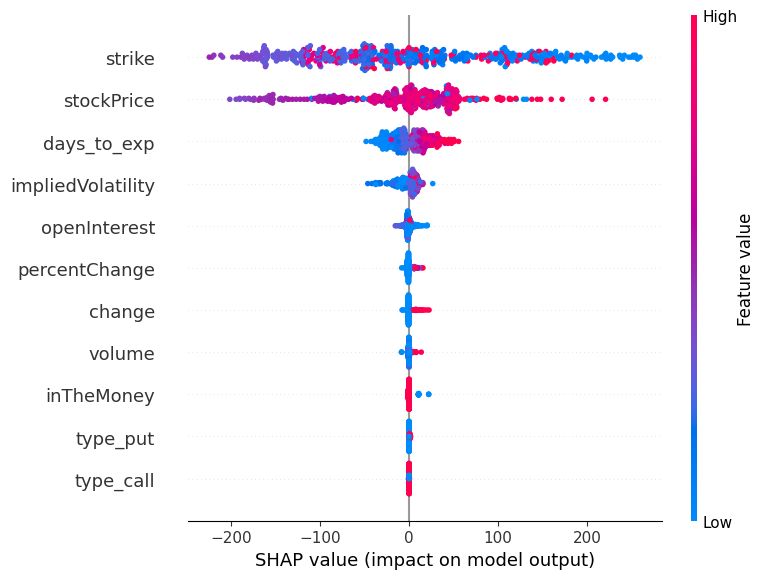

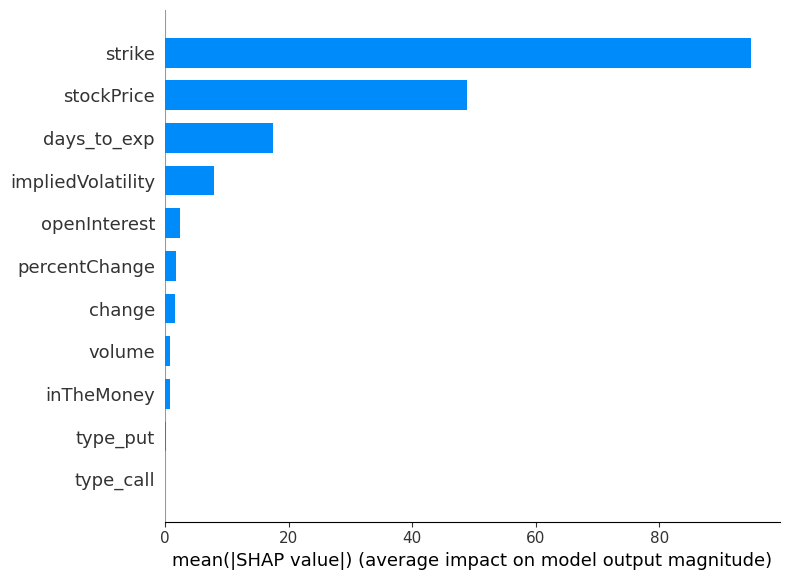

Top 5 features - shap values vs. feature values


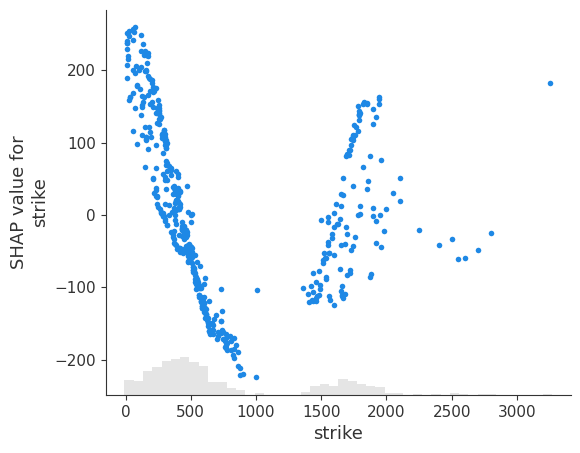

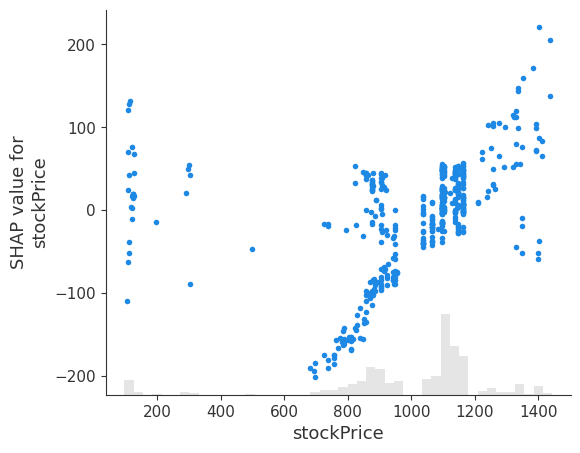

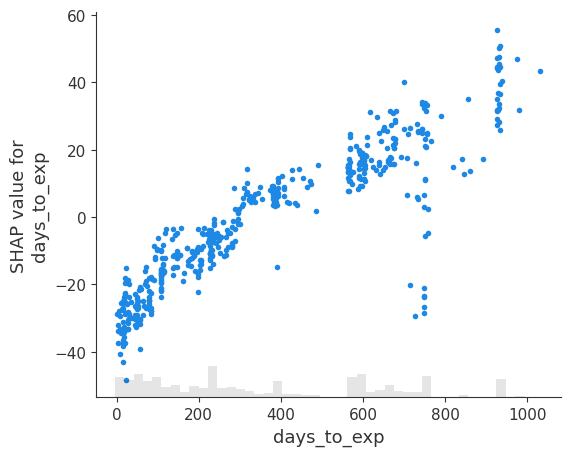

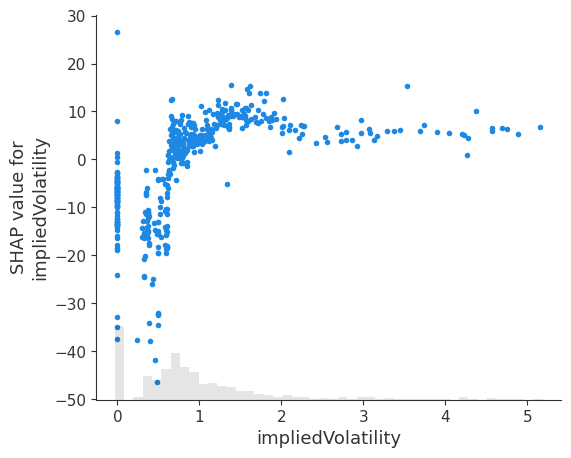

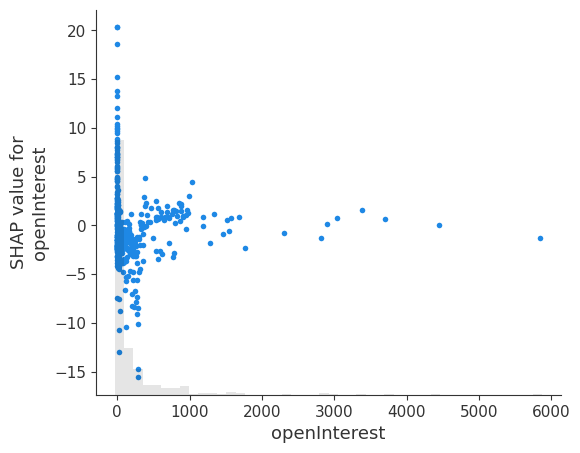

,strike,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,days_to_exp,stockPrice,type_call,type_put
18134,495.0,54.149963,8.502247,1.0,327.0,0.756198,1,380.38,1164.37,1,0


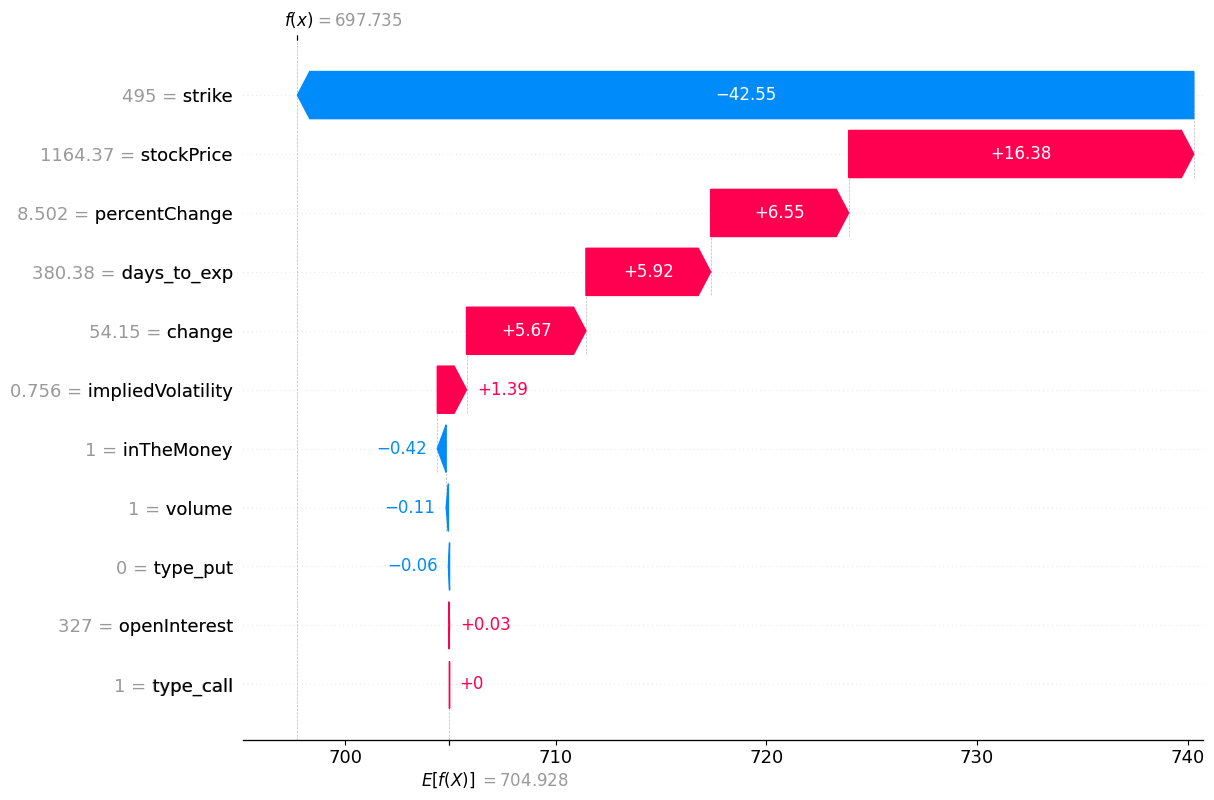

predict
697.7347349672349
actual
691.04
143
bests:
{'clf': GradientBoostingRegressor(), 'clf__max_depth': 4, 'clf__n_estimators': 250}
0.7093043025265444


,idn,params,mean_test_score
0,GradientBoostingRegressor()_4_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.709304
1,GradientBoostingRegressor()_4_200,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.695382
2,GradientBoostingRegressor()_3_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.681852
3,GradientBoostingRegressor()_3_200,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.672684
4,GradientBoostingRegressor()_2_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.648243
5,GradientBoostingRegressor()_2_200,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.635781
6,RandomForestRegressor()_4_200,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.582468
7,RandomForestRegressor()_4_250,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.560473
8,DecisionTreeRegressor()_4,"{'clf': DecisionTreeRegressor(), 'clf__max_dep...",0.541110
9,RandomForestRegressor()_3_200,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.508009


,idn,params,mean_test_score
0,GradientBoostingRegressor()_4_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.709304


model performance:
0.7813469057953448
63.42616775711516
11230.149649060251
105.97240041190089


,Predict,Actual
0,1015.367187,1064.00
1,1125.967494,1138.29
2,1026.450287,1053.00
3,1234.248018,1046.00
4,2111.432552,2335.30
5,1365.634104,1018.15
6,1048.960086,1010.83
7,1027.270185,1016.64
8,1064.718378,1048.60
9,1065.723159,1067.95


shap summary plots


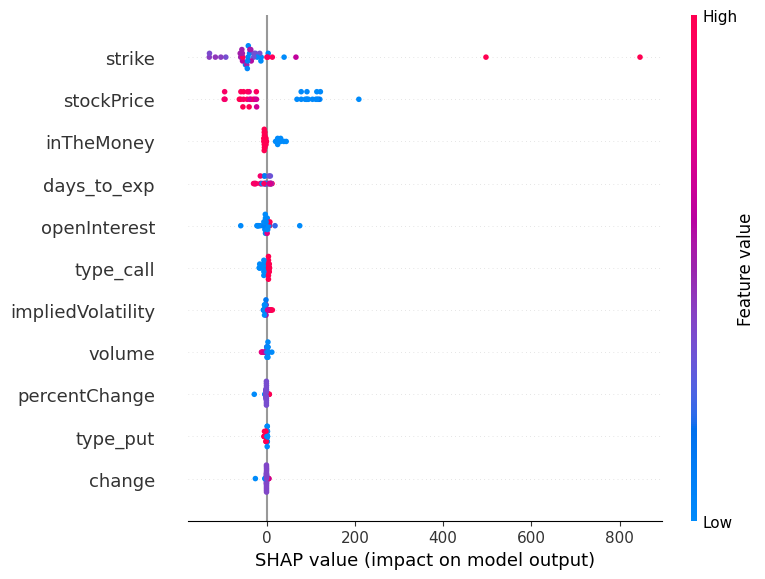

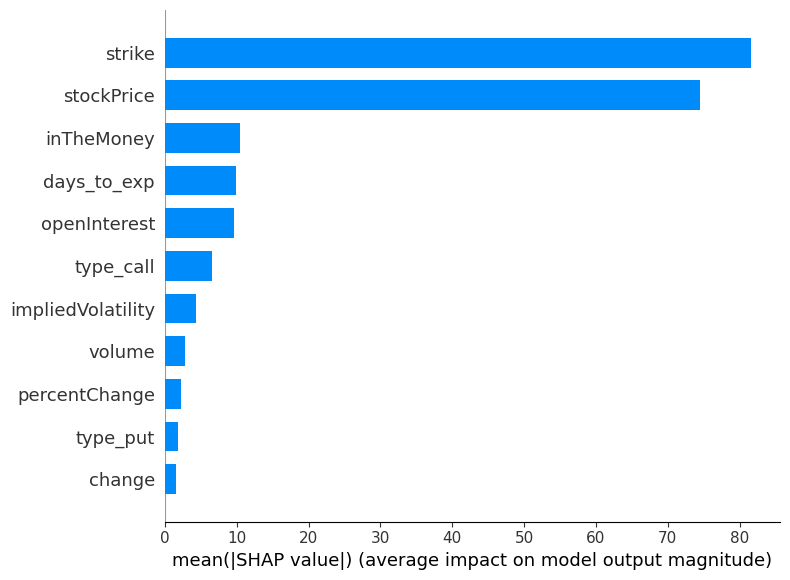

Top 5 features - shap values vs. feature values


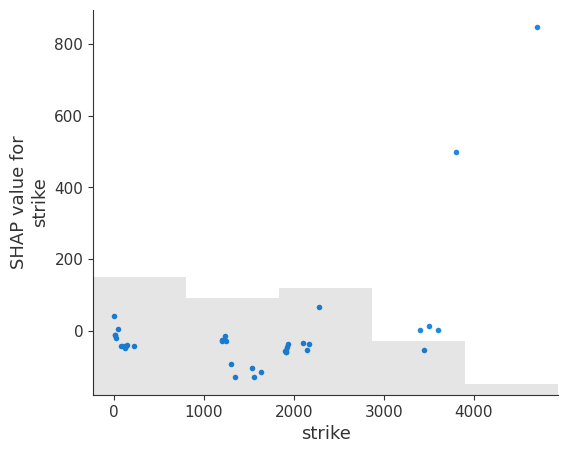

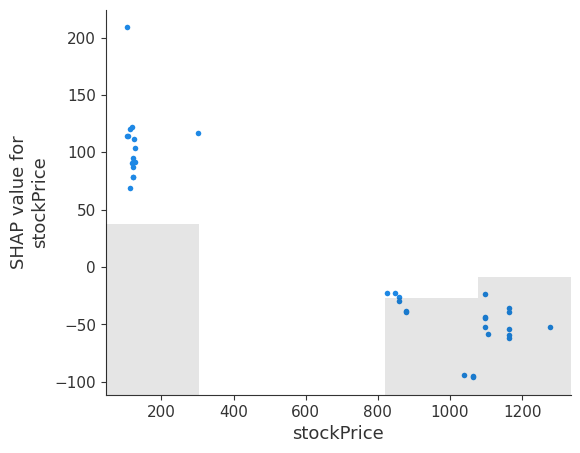

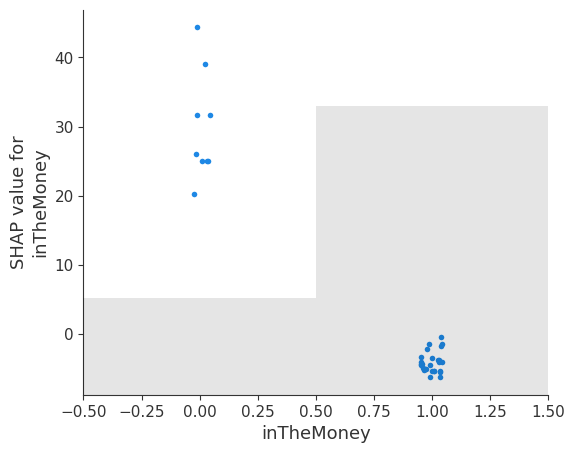

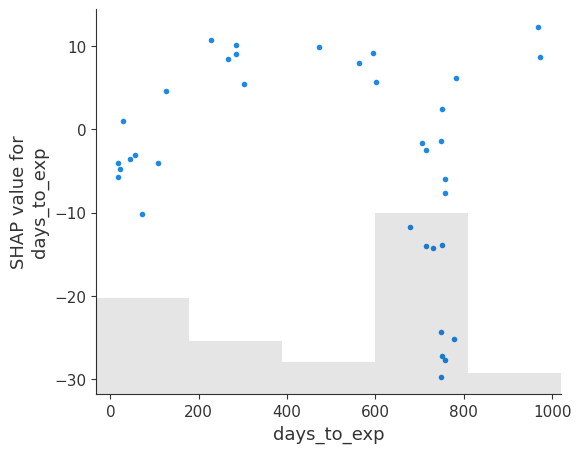

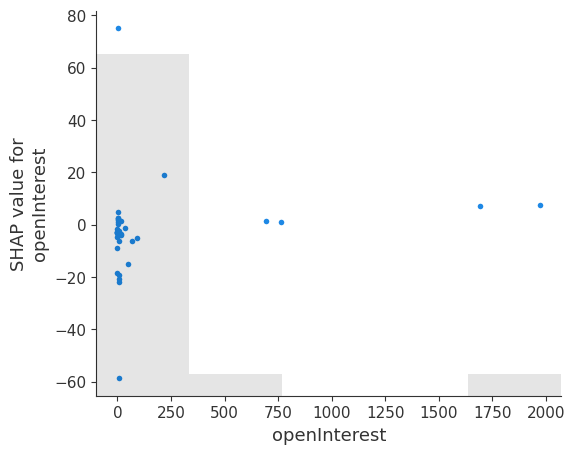

,strike,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,days_to_exp,stockPrice,type_call,type_put
3251,1900.0,0.0,0.0,10.0,0.0,0.00001,1,968.18,824.23,0,1


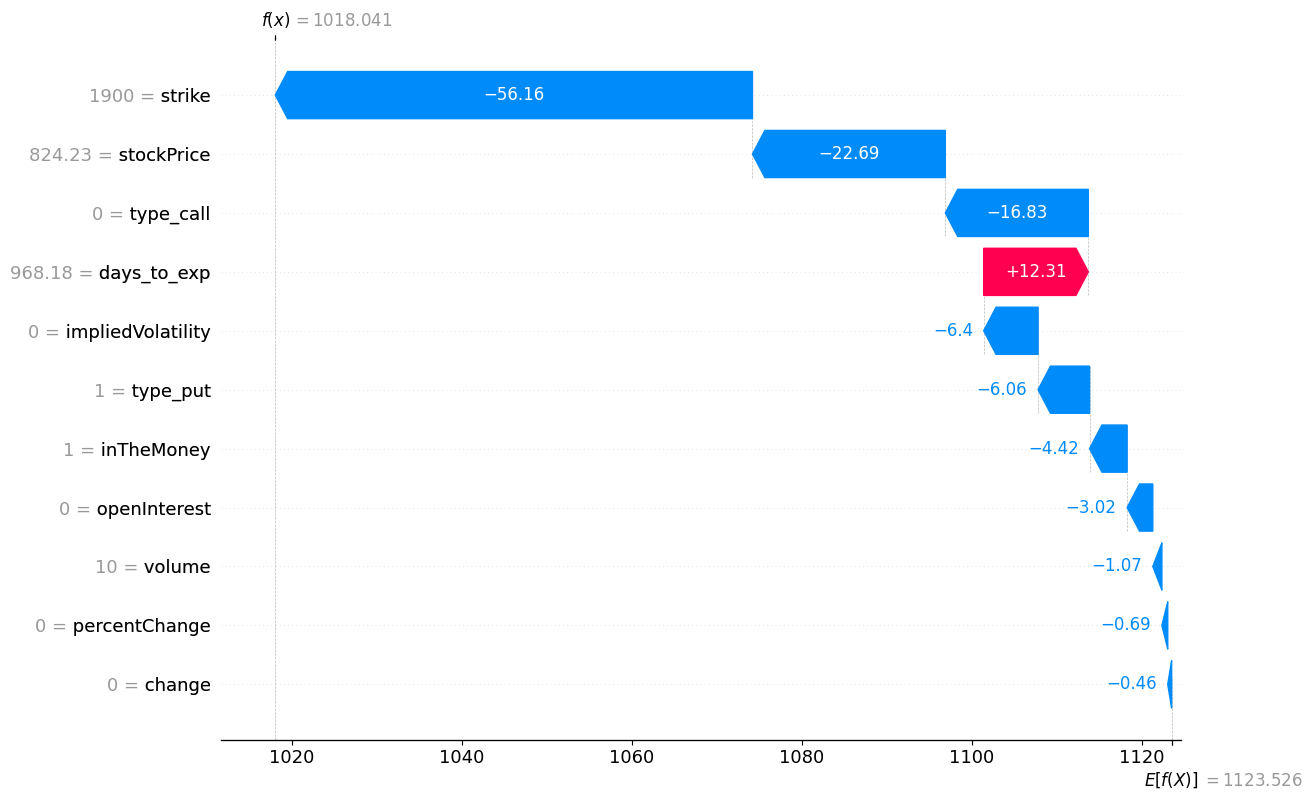

predict
1018.040779018117
actual
1064.0


In [18]:
for df in models:
    print(len(df))
    X_test, y_test, shap_values, X, shap_explainer, bm = train_model(df)
    view_shap_value_for_instance(X_test, y_test, shap_values, X, shap_explainer, bm, 0)
    # view_shap_value_for_instance(X_test, y_test, shap_values, X, shap_explainer, bm, 0)
    # view_shap_value_for_instance(X_test, y_test, shap_values, X, shap_explainer, bm, 0)

In [19]:
# X_test, y_test, shap_values, X, shap_explainer, bm = train_model(df)

In [20]:
# view_shap_value_for_instance(X_test, y_test, shap_values, X, shap_explainer, bm, 0)

In [21]:
# view_shap_value_for_instance(X_test, y_test, shap_values, X, shap_explainer, bm, 1)

In [22]:
# view_shap_value_for_instance(X_test, y_test, shap_values, X, shap_explainer, bm, 2)